# Predicting House Prices with Linear Regression


In [1]:
## Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("Housing.csv")

In [3]:
# Data Cleaning and Encoding
categorical_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

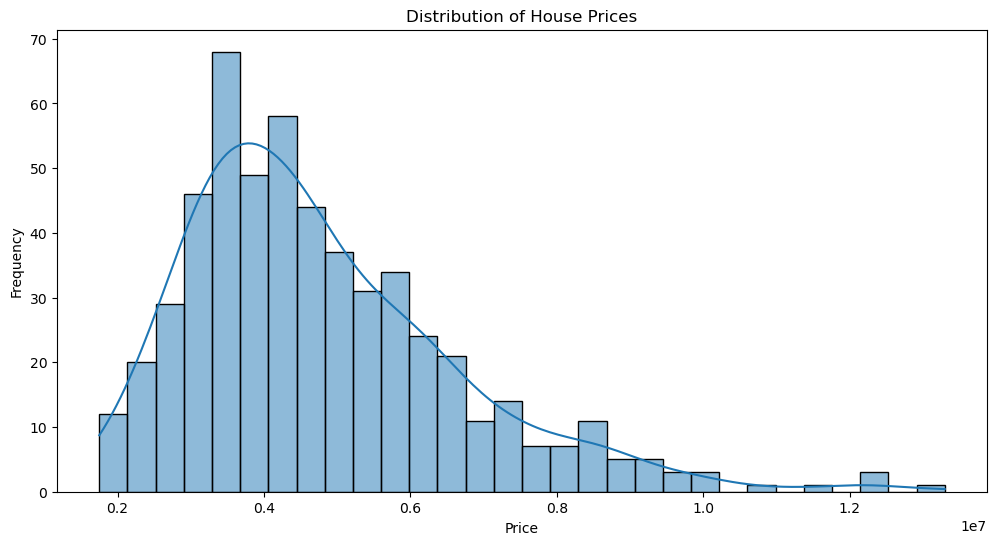

In [4]:
# Exploratory Data Analysis (EDA)

# Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_encoded["price"], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

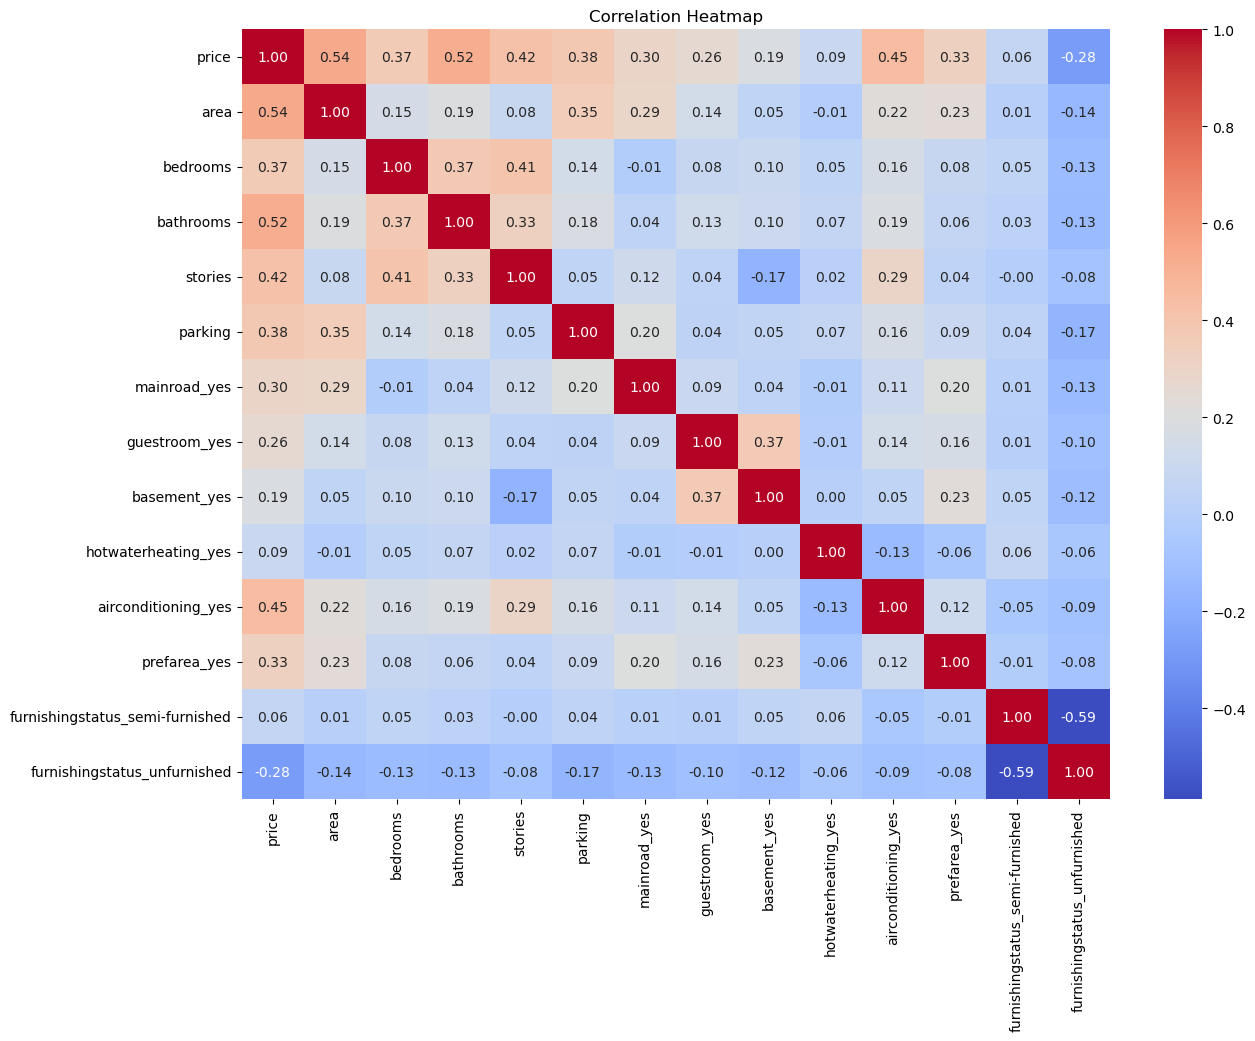

In [5]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

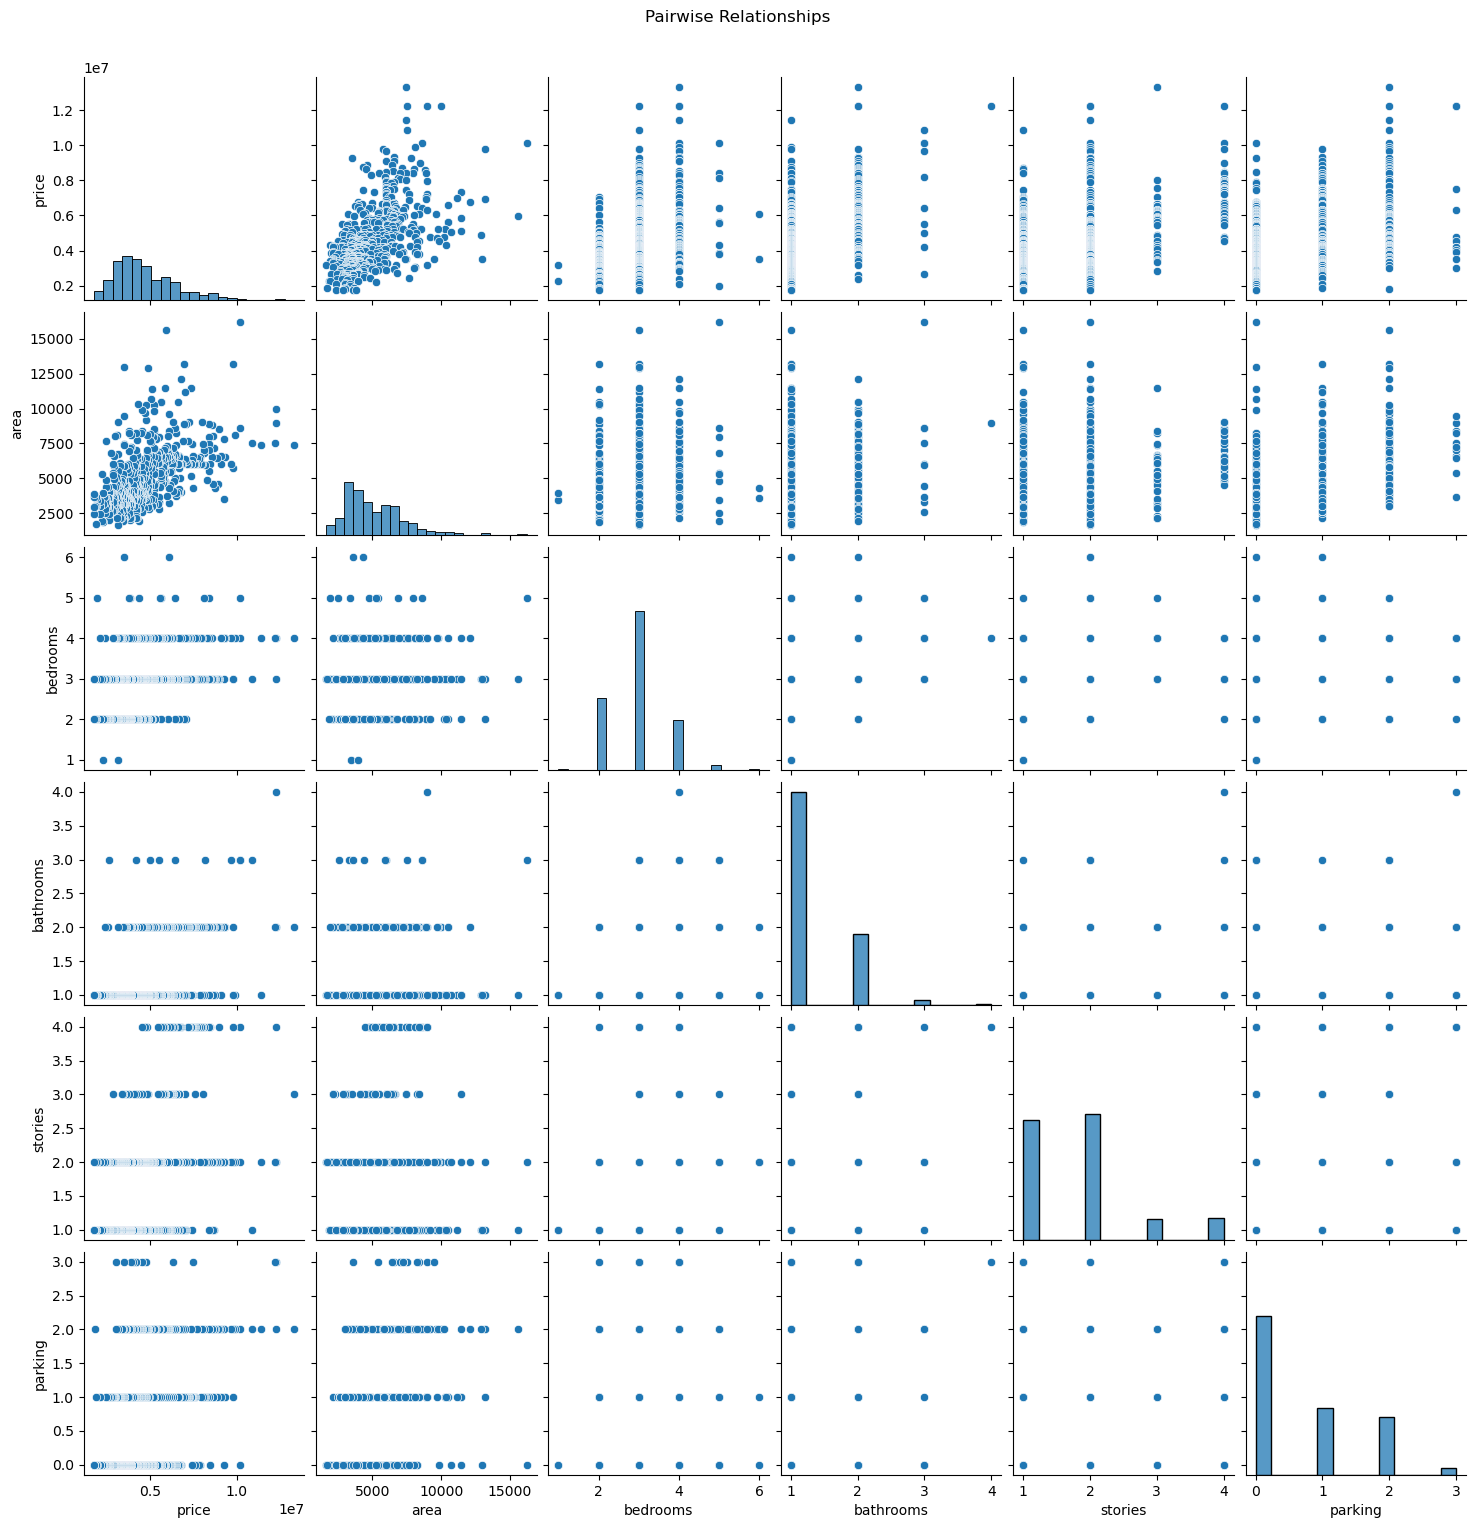

In [6]:
# Pairplot
selected_features = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
sns.pairplot(df_encoded[selected_features])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [7]:
# Prepare Data and Train Model
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
#  Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 1754318687330.6646
R-squared Score: 0.6529242642153182


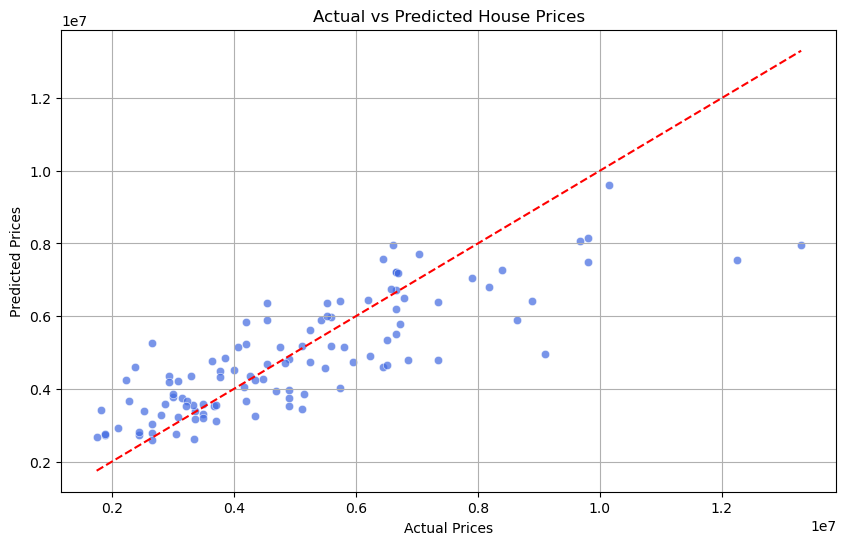

In [9]:
#  Visualize Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
